<a href="https://colab.research.google.com/github/PedroRuiz30/SQP2024/blob/main/ProyectoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Autor: Jesus Alvarado-Huayhuaz

inefable12@gmail.com

# Requerimientos

## PyScopus

In [ ]:
!pip install pyscopus==1.0.3a2

Librerías



In [ ]:
from pyscopus import Scopus
import numpy
import pandas
import requests

### Enlace del Colab con Scopus (API KEY)

*   El usuario debe disponer de una clave **personal**
*   Más información en https://dev.elsevier.com/




In [ ]:
key = "2f9c25a9cb018ff5034a4e33c2a687b6"
scopus = Scopus(key)

## Búsqueda:

Ejemplo:

TITLE-ABS-KEY((("oxytocin") AND ("cheminformatics") AND ("docking")) OR ("oxytocin" AND "dog" AND "docking")  OR ("oxytocin" AND "virtual" AND "simulations"))

TITLE-ABS-KEY((("DFT") AND ("Organic Chemistry") AND ("simulation")) OR ("Mechanism" AND "DFT" AND "organic")  OR ("chemistry" AND "DFT" AND "simulations"))

TITLE-ABS-KEY((("DFT") OR ("organic chemistry")))

TITLE-ABS-KEY("DFT")

TITLE-ABS-KEY((("simulation") AND ("chemistry") AND ("dft")) OR ("simulation" AND "chemistry" AND "dft") OR ("mechanism" AND "simulations"))

TITLE-ABS-KEY(("simulation") AND ("chemistry") AND ("dft") AND  ("mechanism" ))
TITLE-ABS-KEY(("simulation") AND ("chemistry") AND  ("mechanism"))

In [ ]:
s = input("Ingresa tus palabras de búsqueda: ")
search_df = scopus.search(s, count=25, view='STANDARD')

Ingresa tus palabras de búsqueda: TITLE-ABS-KEY((("DFT") AND ("Organic Chemistry") AND ("simulation")) OR ("Mechanism" AND "DFT" AND "organic")  OR ("chemistry" AND "DFT" AND "simulations"))


In [ ]:
from IPython.display import display
display(search_df)

,scopus_id,title,publication_name,issn,isbn,eissn,volume,page_range,cover_date,doi,citation_count,affiliation,aggregation_type,subtype_description,authors,full_text
0,85188718228,Degradation of bisphenol F by peroxymonosulfat...,Journal of Environmental Sciences (China),10010742,None,18787320,150,54-65,2025-04-01,10.1016/j.jes.2024.02.034,0,"[{'name': 'Nankai University', 'city': 'Tianji...",Journal,Article,[],https://api.elsevier.com/content/article/eid/1...
1,85186961852,2D copper-iron bimetallic metal-organic framew...,Journal of Environmental Sciences (China),10010742,None,18787320,149,374-385,2025-03-01,10.1016/j.jes.2024.01.046,0,"[{'name': 'Tongji University', 'city': 'Shangh...",Journal,Article,[],https://api.elsevier.com/content/article/eid/1...
2,85202835769,Efficient peroxymonosulfate activation catalyz...,Separation and Purification Technology,13835866,None,18733794,354,None,2025-02-19,10.1016/j.seppur.2024.129432,0,"[{'name': 'Hunan University', 'city': 'Changsh...",Journal,Article,[],https://api.elsevier.com/content/article/eid/1...
3,85202348565,Iron(III) and neodymium co-extraction mechanis...,Separation and Purification Technology,13835866,None,18733794,354,None,2025-02-19,10.1016/j.seppur.2024.129315,0,"[{'name': 'Université de Montpellier', 'city':...",Journal,Article,[],https://api.elsevier.com/content/article/eid/1...
4,85201673998,Efficient synthesis of MOF-808 nanoparticles f...,Separation and Purification Technology,13835866,None,18733794,354,None,2025-02-19,10.1016/j.seppur.2024.129232,0,[{'name': 'Beijing University of Chemical Tech...,Journal,Article,[],https://api.elsevier.com/content/article/eid/1...
5,85201462610,Vanadium doped Fe-Mn bimetallic oxides as cath...,Separation and Purification Technology,13835866,None,18733794,354,None,2025-02-19,10.1016/j.seppur.2024.129174,0,"[{'name': 'Nanjing Agricultural University', '...",Journal,Article,[],https://api.elsevier.com/content/article/eid/1...
6,85201459354,Polychloride and benzene ring synergistically ...,Separation and Purification Technology,13835866,None,18733794,354,None,2025-02-19,10.1016/j.seppur.2024.129231,0,"[{'name': 'Jilin Normal University', 'city': '...",Journal,Article,[],https://api.elsevier.com/content/article/eid/1...
7,85200950450,MOF-derived CuCo carbon microspheres assembled...,Separation and Purification Technology,13835866,None,18733794,354,None,2025-02-19,10.1016/j.seppur.2024.129107,0,[{'name': 'University of Chinese Academy of Sc...,Journal,Article,[],https://api.elsevier.com/content/article/eid/1...
8,85200441792,Insight into the mechanism of peracetic acid a...,Separation and Purification Technology,13835866,None,18733794,354,None,2025-02-19,10.1016/j.seppur.2024.129005,0,"[{'name': 'Huaqiao University', 'city': 'Quanz...",Journal,Article,[],https://api.elsevier.com/content/article/eid/1...
9,85199148394,Bottom-up fabrication of DABCO-based bicationi...,Separation and Purification Technology,13835866,None,18733794,354,None,2025-02-19,10.1016/j.seppur.2024.128851,0,"[{'name': 'Nanjing Tech University', 'city': '...",Journal,Article,[],https://api.elsevier.com/content/article/eid/1...


## Artículos, conference papers, books, etc

In [ ]:
search_df.subtype_description.unique()

array(['Article'], dtype=object)

<ipython-input-28-c525a455e4cc>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=subtype_description.index, y=subtype_description.values, palette='viridis')


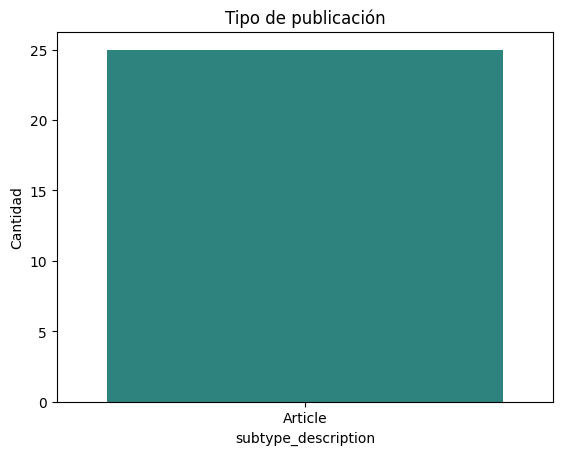

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Contar las ocurrencias de cada tipo de publicación y ordenar los datos por el índice
subtype_description = search_df['subtype_description'].value_counts()

# Crear el gráfico de barras con coloración por tipo de publicación
ax = sns.barplot(x=subtype_description.index, y=subtype_description.values, palette='viridis')

# Agregar etiquetas y título
plt.ylabel('Cantidad')
plt.title('Tipo de publicación')

# Formatear el eje y con un decimal
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.0f'))

# Mostrar el gráfico
plt.show()

In [ ]:
search_df.head(2)

,scopus_id,title,publication_name,issn,isbn,eissn,volume,page_range,cover_date,doi,citation_count,affiliation,aggregation_type,subtype_description,authors,full_text
0,85188718228,Degradation of bisphenol F by peroxymonosulfat...,Journal of Environmental Sciences (China),10010742,None,18787320,150,54-65,2025-04-01,10.1016/j.jes.2024.02.034,0,"[{'name': 'Nankai University', 'city': 'Tianji...",Journal,Article,[],https://api.elsevier.com/content/article/eid/1...
1,85186961852,2D copper-iron bimetallic metal-organic framew...,Journal of Environmental Sciences (China),10010742,None,18787320,149,374-385,2025-03-01,10.1016/j.jes.2024.01.046,0,"[{'name': 'Tongji University', 'city': 'Shangh...",Journal,Article,[],https://api.elsevier.com/content/article/eid/1...


In [ ]:
search_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scopus_id            25 non-null     object
 1   title                25 non-null     object
 2   publication_name     25 non-null     object
 3   issn                 25 non-null     object
 4   isbn                 0 non-null      object
 5   eissn                22 non-null     object
 6   volume               25 non-null     object
 7   page_range           2 non-null      object
 8   cover_date           25 non-null     object
 9   doi                  25 non-null     object
 10  citation_count       25 non-null     int64 
 11  affiliation          25 non-null     object
 12  aggregation_type     25 non-null     object
 13  subtype_description  25 non-null     object
 14  authors              25 non-null     object
 15  full_text            25 non-null     object
dtypes: int64(1

<Axes: >

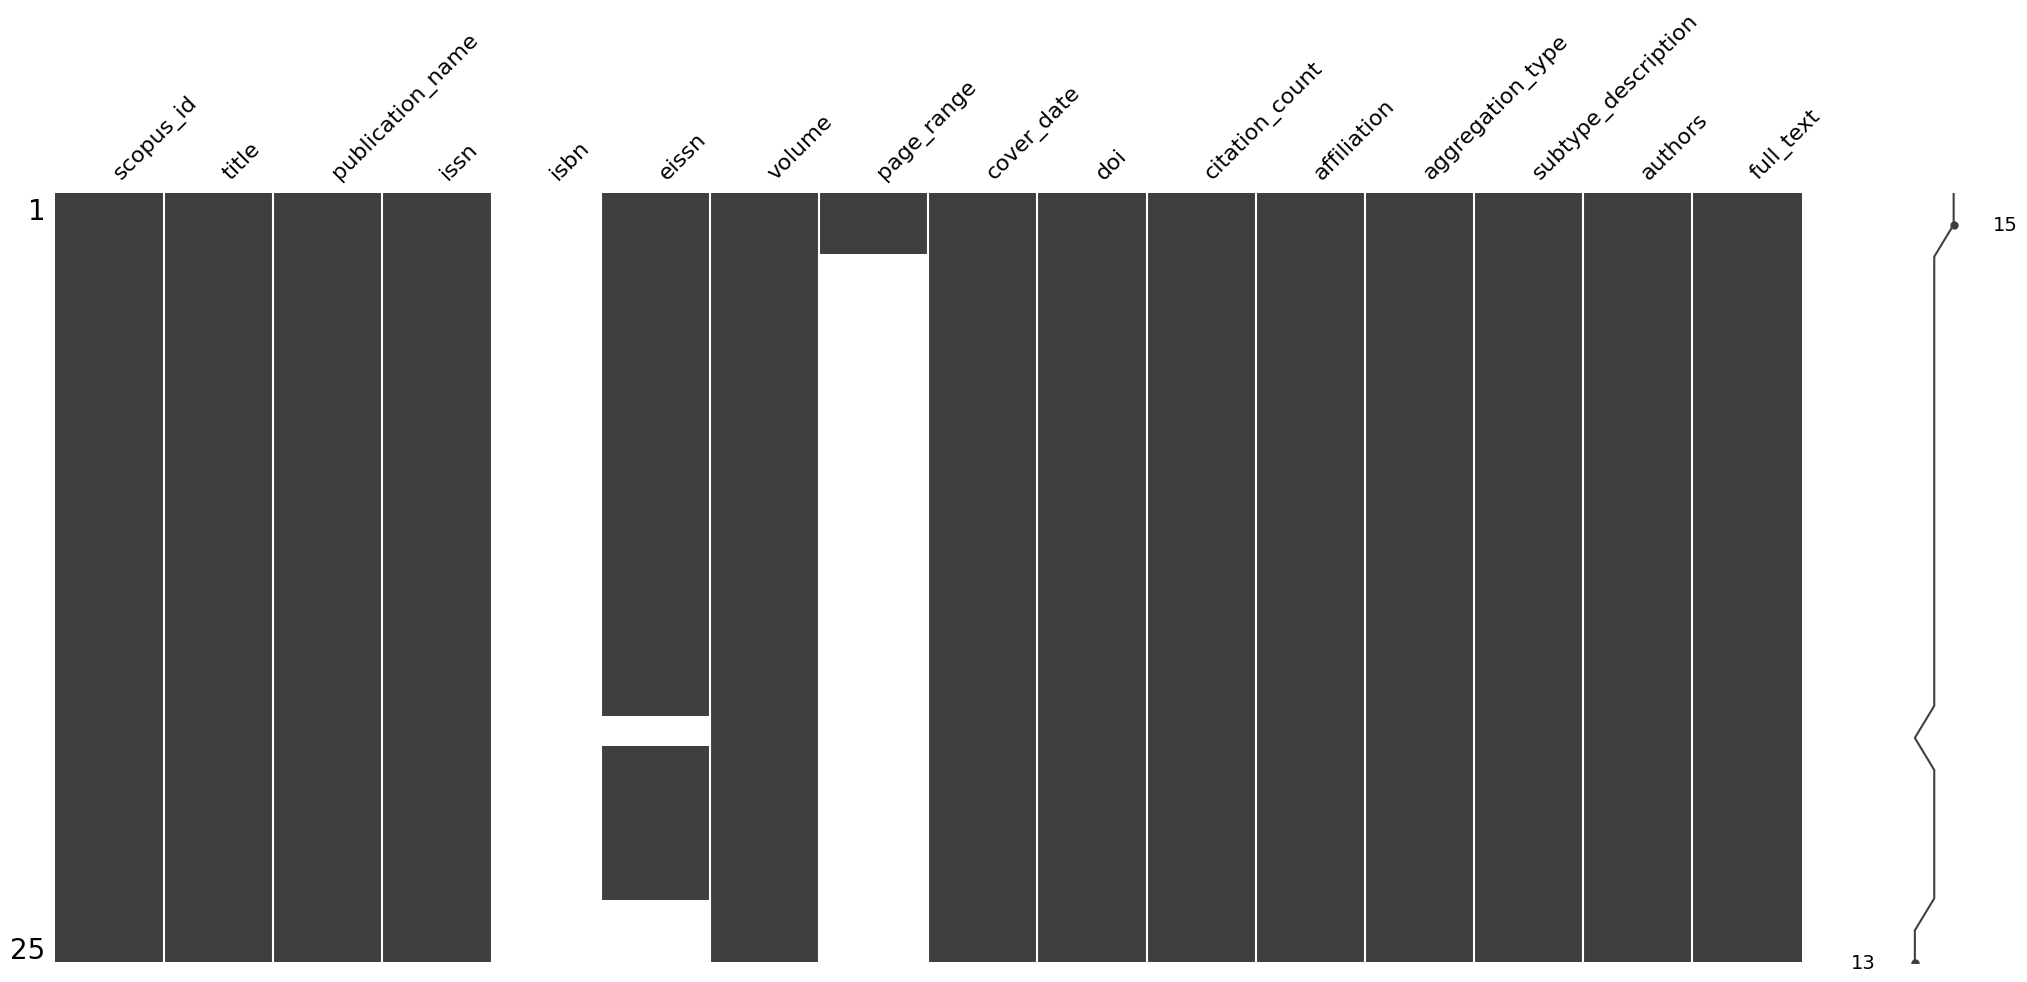

In [ ]:
import missingno as msno
msno.matrix(search_df)

In [ ]:
%%capture
!pip install -U "transformers==4.40.0" --upgrade
!pip install -i https://pypi.org/simple/ bitsandbytes
!pip install accelerate

In [ ]:
#@title Cargando LLAMA3
import transformers
import torch

model_id = "unsloth/llama-3-8b-Instruct-bnb-4bit"

pipeline = transformers.pipeline(
    "text-generation",
    model=model_id,
    model_kwargs={
        "torch_dtype": torch.float16,
        "quantization_config": {"load_in_4bit": True},
        "low_cpu_mem_usage": True,
    },
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

Unused kwargs: ['_load_in_4bit', '_load_in_8bit', 'quant_method']. These kwargs are not used in <class 'transformers.utils.quantization_config.BitsAndBytesConfig'>.
/usr/local/lib/python3.10/dist-packages/transformers/quantizers/auto.py:159: UserWarning: You passed `quantization_config` or equivalent parameters to `from_pretrained` but the model you're loading already has a `quantization_config` attribute. The `quantization_config` from the model will be used.
  warnings.warn(warning_msg)


model.safetensors:   0%|          | 0.00/5.70G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/220 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/51.1k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/345 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
df = pd.read_csv("Data.csv")
df

,Authors,Author full names,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,...,DOI,Link,Abstract,Author Keywords,Index Keywords,Document Type,Publication Stage,Open Access,Source,EID
0,Fan W.; Tan D.; Zhang Q.; Wang H.,"Fan, Wenjie (36958462900); Tan, Dazhi (5166594...",36958462900; 51665947100; 7406716711; 56505170600,Computational study of diketopyrrolopyrrole-ba...,2015,Journal of Molecular Graphics and Modelling,57,NaN,NaN,62.0,...,10.1016/j.jmgm.2015.01.006,https://www.scopus.com/inward/record.uri?eid=2...,Four diketopyrrolopyrrole (DPP)-based organic ...,DFT calculations; DPP-based dyes; DSSCs; Indol...,"Coloring Agents; Electrons; Light; Models, Mol...",Article,Final,NaN,Scopus,2-s2.0-84922275844
1,Mhadhbi N.; Dgachi S.; Belgacem S.; Ahmed A.B....,"Mhadhbi, Noureddine (55062432600); Dgachi, Sou...",55062432600; 57193667527; 57970516200; 6507622...,"Design, theoretical study, druggability, pharm...",2023,Journal of Molecular Structure,1274,NaN,134439,NaN,...,10.1016/j.molstruc.2022.134439,https://www.scopus.com/inward/record.uri?eid=2...,This study covers the synthesis and physico-ch...,Anticancer effect; DFT/B3LYP computations; Opt...,Bioactivity; Computational chemistry; Design f...,Article,Final,All Open Access; Green Open Access,Scopus,2-s2.0-85142170385
2,Yin G.; Cai S.; Wang Y.; Zhao Z.,"Yin, Guo (58655960800); Cai, Shuang (572094125...",58655960800; 57209412556; 58656430100; 5719530...,Theoretical Insights into the Effect of Conjug...,2023,ChemistrySelect,8,39.0,e202302652,NaN,...,10.1002/slct.202302652,https://www.scopus.com/inward/record.uri?eid=2...,The research of organic photovoltaic materials...,Charge transfer; computational chemistry; DFT/...,NaN,Article,Final,All Open Access; Bronze Open Access,Scopus,2-s2.0-85174490707
3,Chang H.; Xu Y.; Lv L.; Liu H.; Wang Q.; Huang X.,"Chang, Hanwen (57211383320); Xu, Yongbao (5698...",57211383320; 56984640900; 57211382980; 5571944...,Computational study on C1- versus C3-regiosele...,2019,Molecular Catalysis,477,NaN,110540,NaN,...,10.1016/j.mcat.2019.110540,https://www.scopus.com/inward/record.uri?eid=2...,The regioselectivity in Pd(II)-catalyzed C–H d...,2-naphthyl ureas; DFT calculations; Naphthalen...,Aniline; Catalysis; Computation theory; Densit...,Article,Final,NaN,Scopus,2-s2.0-85073706095
4,Üngördü A.,"Üngördü, Ayhan (57194105399)",57194105399,Organic light-emitting diode behaviors of some...,2023,International Journal of Quantum Chemistry,123,21.0,e27208,NaN,...,10.1002/qua.27208,https://www.scopus.com/inward/record.uri?eid=2...,Organic light-emitting light diodes (OLEDs) ha...,charge transfer; DFT; Marcus theory; OLED mate...,Computation theory; Computational chemistry; D...,Article,Final,All Open Access; Hybrid Gold Open Access,Scopus,2-s2.0-85168316918
5,Hossain M.A.; Jewaratnam J.; Ramalingam A.; Sa...,"Hossain, Md. Arafat (59149101300); Jewaratnam,...",59149101300; 47962360500; 35745524500; 5694821...,A DFT method analysis for formation of hydroge...,2018,Fuel,212,NaN,NaN,49.0,...,10.1016/j.fuel.2017.09.098,https://www.scopus.com/inward/record.uri?eid=2...,Quantum chemical calculation has been consider...,Acetic acid; DFT; HOMO–LUMO; Hydrogen; Quantum...,Acetic acid; Bond length; Carbon; Carbon dioxi...,Article,Final,NaN,Scopus,2-s2.0-85031093312
6,Tarun T.; Singh P.; Kaur H.; Walia G.K.; Randh...,"Tarun, Tarun (57215220988); Singh, Paramjot (5...",57215220988; 57212591747; 57197754594; 5719048...,Defective GaAs nanoribbon–based biosensor for ...,2021,Journal of Molecular Modeling,27,9.0,270,NaN,...,10.1007/s00894-021-04889-9,https://www.scopus.com/inward/record.uri?eid=2...,Density functional theory-based first-principl...,Biomarker; Biosensor; Density functional theor...,"Arsenicals; Biomarkers, Tumor; Biosensing Tech...",Article,Final,NaN,Scopus,2-s2.0-85113824017
7,Lorin S.; Rajaraman D.; Sonadevi S.; Jaganatha...,"Lorin, Solo (58316314400); Rajaraman, D. (5670...",58316314400; 56707304900; 58033215200; 5722173...,"Synthesis, qua

In [ ]:
df.columns

Index(['Authors', 'Author full names', 'Author(s) ID', 'Title', 'Year',
       'Source title', 'Volume', 'Issue', 'Art. No.', 'Page start', 'Page end',
       'Page count', 'Cited by', 'DOI', 'Link', 'Abstract', 'Author Keywords',
       'Index Keywords', 'Document Type', 'Publication Stage', 'Open Access',
       'Source', 'EID'],
      dtype='object')

In [ ]:
context1 = df['Abstract'][0]
context2 =  df['Abstract'][1]
context3 =  df['Abstract'][2]

LISTA DE PREGUNTAS:

1.- ¿Este articulo es adecuado para comenzar a estudiar quimica computacional como un proyecto piloto con estudiantes de septimo ciclo de la carrera de quimica?

2.- ¿Cual es el tema principal de este trabajo, y que metodos computacionales se estan aplicando?

3.- Con respecto a este trabajo, cuales vendrian las limitaciones en su estudio.


In [ ]:
#@title Pregunta de  ¿Este articulo es adecuado para comenzar a estudiar quimica computacional como un proyecto piloto con estudiantes de septimo ciclo de la carrera de quimica?
messages = [
    {"role"   : "system",
     "content": context1,
     "content": context2,
     "content": context3},
    {"role"   : "user",
     "content": """ ¿Este articulo es adecuado para comenzar a estudiar quimica computacional como un proyecto piloto con estudiantes de septimo ciclo de la carrera de quimica?"""},
]

#computacional

prompt = pipeline.tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
)

terminators = [
    pipeline.tokenizer.eos_token_id,
    pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

outputs = pipeline(
    prompt,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.6,
    top_p=0.9,
)

print(outputs[0]["generated_text"][len(prompt):])

En general, el artículo es adecuado para estudiantes de séptimo ciclo de la carrera de química que están interesados en comenzar a estudiar química computacional como un proyecto piloto. A continuación, te presento algunos argumentos a favor y en contra:

Argumentos a favor:

1. El artículo es fácilmente comprensible para estudiantes de séptimo ciclo de la carrera de química, ya que utiliza conceptos y términos que son comunes en la química y la física.
2. El artículo presenta un problema clásico en la química computacional, es decir, el diseño de materiales para células solares, lo que es un tema interesante y relevante para estudiantes de química.
3. El artículo utiliza herramientas y técnicas de química computacional, como la teoría de la función de densidad y la teoría de la función de densidad temporal, que son fundamentales para el estudio de la química computacional.
4. El artículo presenta resultados numéricos y discute la relación entre las propiedades estructurales y fotoeléc

In [ ]:
#@title Pregunta de  ¿Cual es el tema principal de este trabajo, y que metodos computacionales se estan aplicando?
messages = [
    {"role"   : "system",
     "content": context1,
     "content": context2,
     "content": context3},
    {"role"   : "user",
     "content": """¿Cual es el tema principal de este trabajo, y que metodos computacionales se estan aplicando?"""},
]

#computacional

prompt = pipeline.tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
)

terminators = [
    pipeline.tokenizer.eos_token_id,
    pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

outputs = pipeline(
    prompt,
    max_new_tokens=256,
    eos_token_id=terminators,
    do_sample=True,
    temperature=0.6,
    top_p=0.9,
)

print(outputs[0]["generated_text"][len(prompt):])

El tema principal de este trabajo es el diseño y optimización de pequeños moléculas aceptadoras para mejorar la eficiencia de conversión de energía en células solares orgánicas (OSC).

Los métodos computacionales utilizados en este trabajo son:

1. Teoría de función de densidad (DFT): se utiliza para calcular las propiedades del estado fundamental de los materiales, como la estructura electrónica y la energía de banda.
2. Teoría de función de densidad temporal (TDDFT): se utiliza para calcular las propiedades del estado excitado de los materiales, como la energía de excitación y la vida media de los electrones excitados.

Estos métodos computacionales permiten a los investigadores simular y predecir las propiedades de los materiales y su comportamiento en presencia de luz, lo que puede ayudar a diseñar y optimizar nuevos materiales para aplicaciones en OSC.


In [ ]:
ntable = df['Abstract']
ntable

,Abstract
0,Four diketopyrrolopyrrole (DPP)-based organic ...
1,This study covers the synthesis and physico-ch...
2,The research of organic photovoltaic materials...
3,The regioselectivity in Pd(II)-catalyzed C–H d...
4,Organic light-emitting light diodes (OLEDs) ha...
5,Quantum chemical calculation has been consider...
6,Density functional theory-based first-principl...
7,"A novel 2-(2,3-dihydrobenzo[b][1,4]dioxin-6-yl..."
8,Adsorption of β-D-glucopyranuronic acid (GlcA)...
9,Cancer is a global public health problem chara...


In [ ]:
def score(input):
  messages = [
    {"role"   : "system",
     "content": context1},
    {"role"   : "user",
     "content": "Eres un especialista en química computacional y en la enseñanza universitaria, puntúa del 1 al 5, donde 1 es lo peor y 5 es lo mejor, imprime solamente el número o puntuacion de: ¿Que tan adecuado es este articulo para su estudio con estudiantes?"},
  ]

  prompt = pipeline.tokenizer.apply_chat_template(
          messages,
          tokenize=False,
          add_generation_prompt=True
  )

  terminators = [
      pipeline.tokenizer.eos_token_id,
      pipeline.tokenizer.convert_tokens_to_ids("<|eot_id|>")
  ]

  outputs = pipeline(
      prompt,
      max_new_tokens=256,
      eos_token_id=terminators,
      do_sample=True,
      temperature=0.6,
      top_p=0.9,
  )

  return outputs[0]["generated_text"][len(prompt):]

In [ ]:
ntable['Score_1'] = None

for i in range(2):
  context1 = df["Abstract"][i]
  response = score(context1)
  df['Score_1'][i] = response

<ipython-input-89-7908789fd8e7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score_1'][i] = response
<ipython-input-89-7908789fd8e7>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score_1'][i] = response


In [ ]:
ntable

,Abstract
0,Four diketopyrrolopyrrole (DPP)-based organic ...
1,This study covers the synthesis and physico-ch...
2,The research of organic photovoltaic materials...
3,The regioselectivity in Pd(II)-catalyzed C–H d...
4,Organic light-emitting light diodes (OLEDs) ha...
5,Quantum chemical calculation has been consider...
6,Density functional theory-based first-principl...
7,"A novel 2-(2,3-dihydrobenzo[b][1,4]dioxin-6-yl..."
8,Adsorption of β-D-glucopyranuronic acid (GlcA)...
9,Cancer is a global public health problem chara...
